In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [107]:
data = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum09/data/data.csv')

In [108]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [109]:
data.tail ()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [111]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


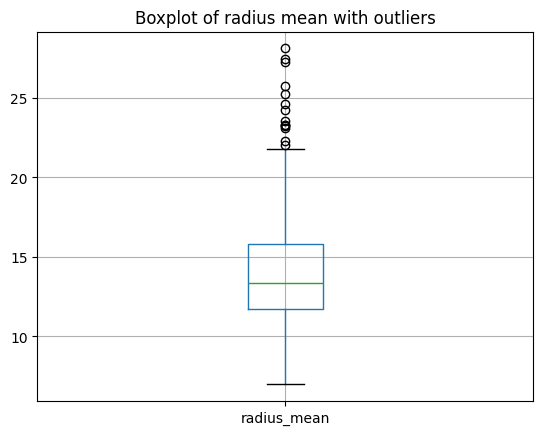

In [112]:
data.boxplot(column=['radius_mean'])
plt.title("Boxplot of radius mean with outliers")
plt.show()

In [113]:
data['radius_mean'].fillna(data['radius_mean'].median(), inplace=True)

/tmp/ipython-input-4025620246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['radius_mean'].fillna(data['radius_mean'].median(), inplace=True)


In [114]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [115]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [116]:
data['radius_mean'].value_counts()

,count
radius_mean,
12.340,4
11.060,3
10.260,3
12.770,3
13.050,3
...,...
19.810,1
13.540,1
13.080,1


In [117]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [118]:
# untuk Hapus kolom tidak dipakai
data = data.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Y = diagnosis
y = data["diagnosis"]

# X = semua kolom fitur selain diagnosis
X = data.drop(columns=["diagnosis"])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [120]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [121]:
y_pred = model.predict(X_test)

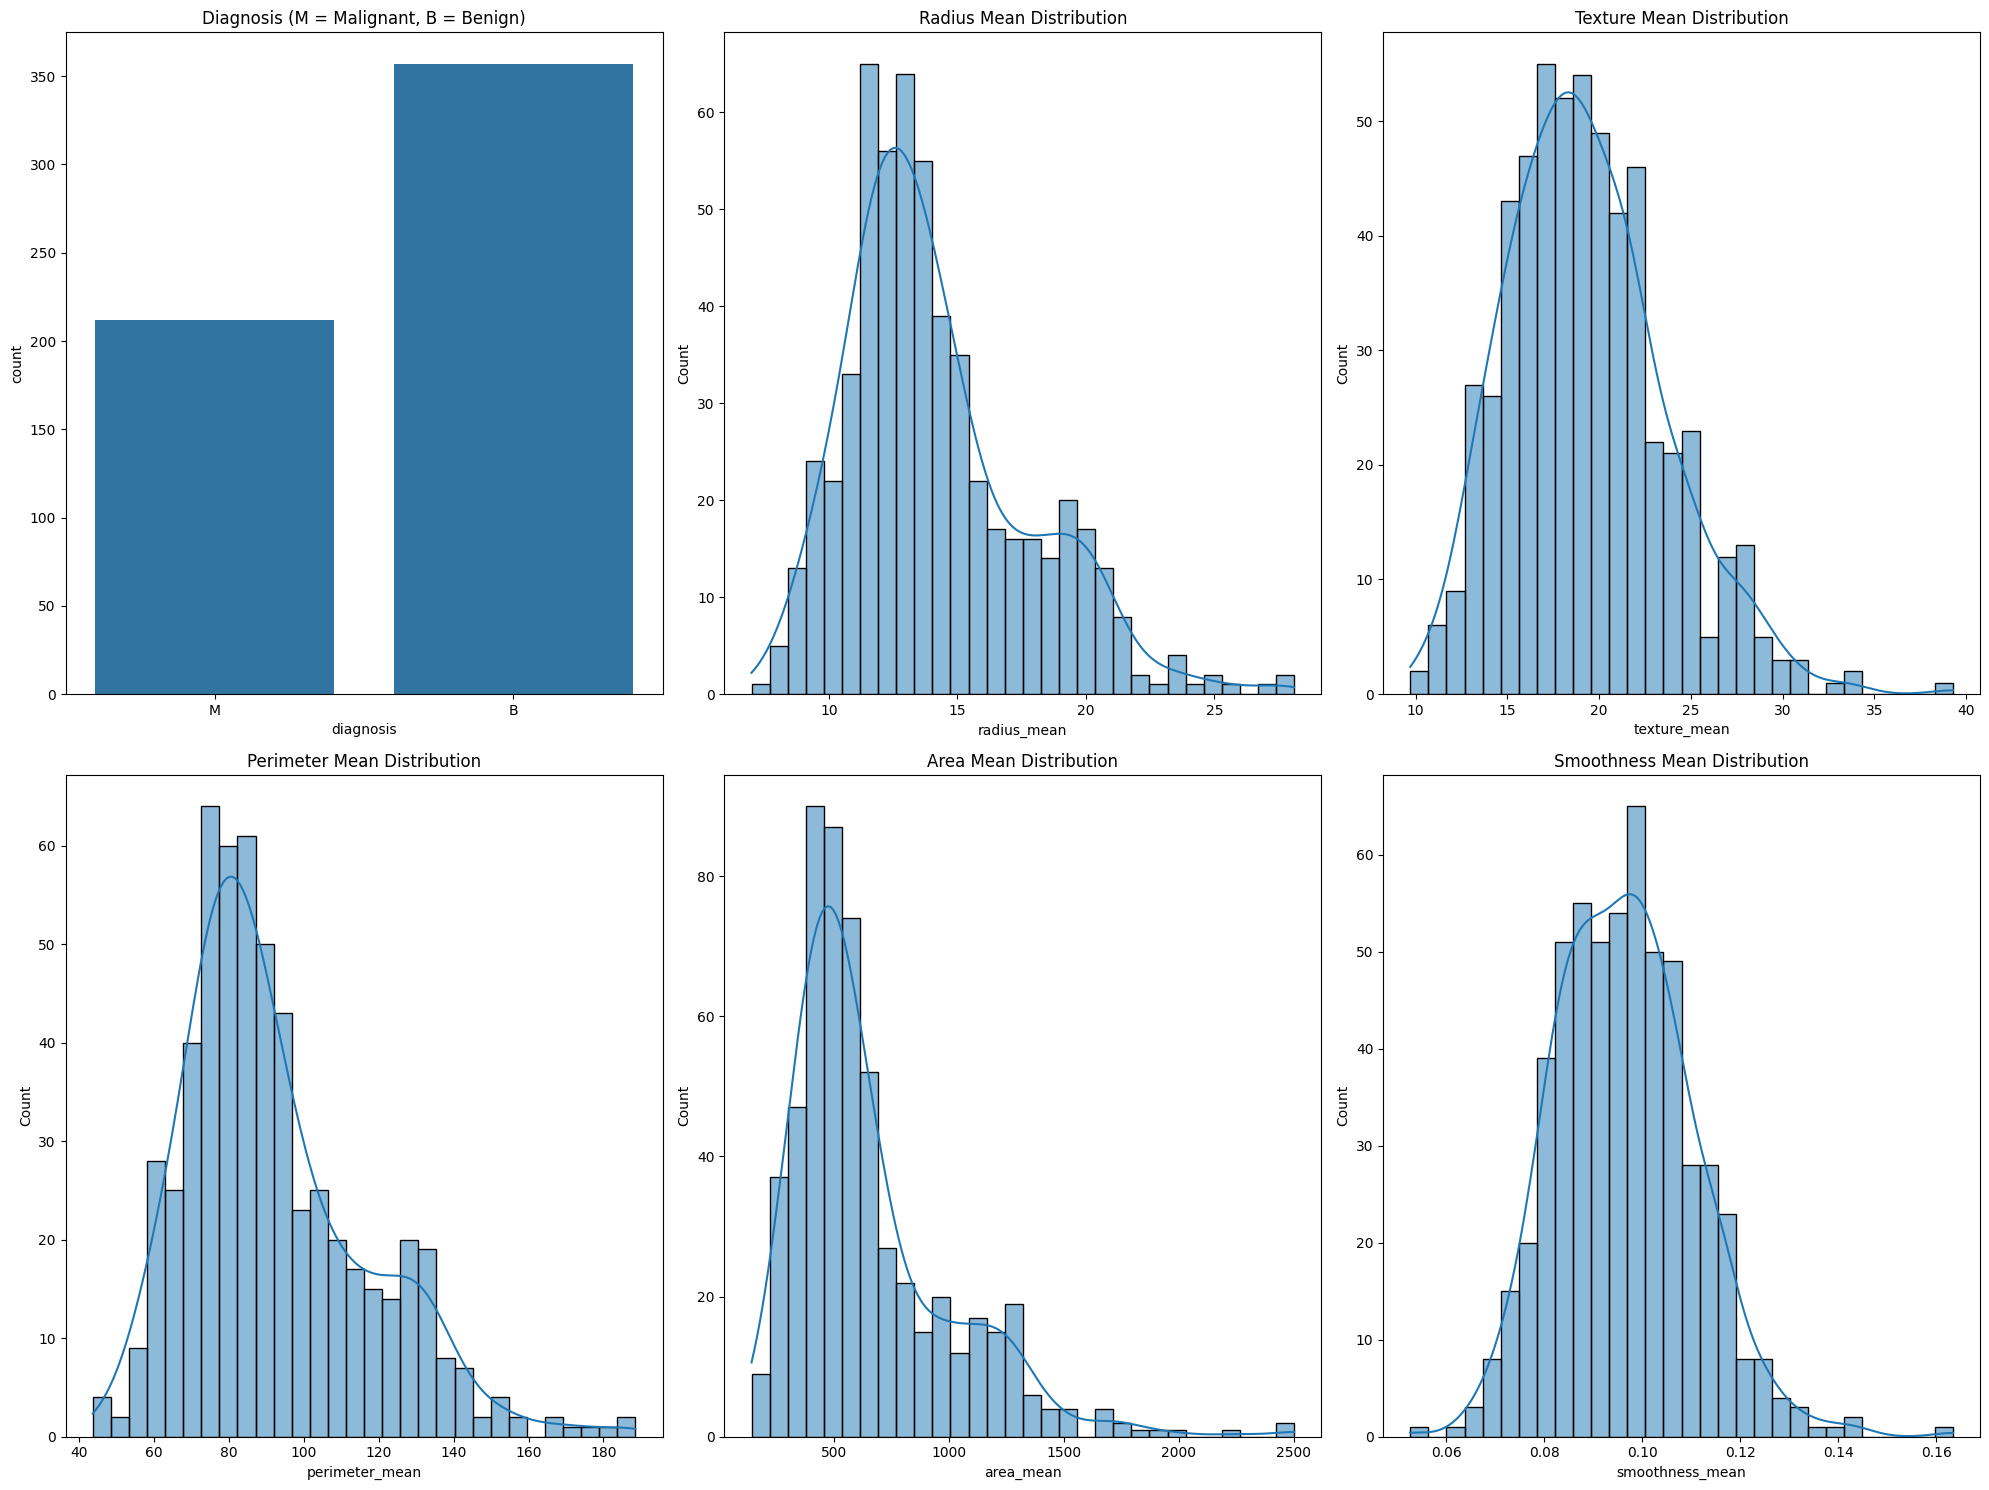

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()


sns.countplot(x='diagnosis', data=data, ax=axes[0])
axes[0].set_title('Diagnosis (M = Malignant, B = Benign)')


sns.histplot(data['radius_mean'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Radius Mean Distribution')


sns.histplot(data['texture_mean'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Texture Mean Distribution')


sns.histplot(data['perimeter_mean'], bins=30, ax=axes[3], kde=True)
axes[3].set_title('Perimeter Mean Distribution')


sns.histplot(data['area_mean'], bins=30, ax=axes[4], kde=True)
axes[4].set_title('Area Mean Distribution')


sns.histplot(data['smoothness_mean'], bins=30, ax=axes[5], kde=True)
axes[5].set_title('Smoothness Mean Distribution')

plt.tight_layout()
plt.show()


In [123]:
data['diagnosis'] = data['diagnosis'].astype(str).str.strip().str.upper()

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [124]:
data['diagnosis'] = data['diagnosis'].astype(str).str.strip().str.upper()
data.replace({'diagnosis': {'M': 1, 'B': 0}}, inplace=True)

In [125]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [126]:
Y.head()

,diagnosis
0,NAN
1,NAN
2,NAN
3,NAN
4,NAN


In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [128]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [129]:
data['diagnosis'].unique()

array(['1', '0'], dtype=object)

In [130]:
data['radius_mean'].unique()

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [132]:
## accuracy
train_pred_nb = model.predict(X_train_scaled)
test_pred_nb = model.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [133]:
print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  0.0
Testing Accuracy (NB):  0.0


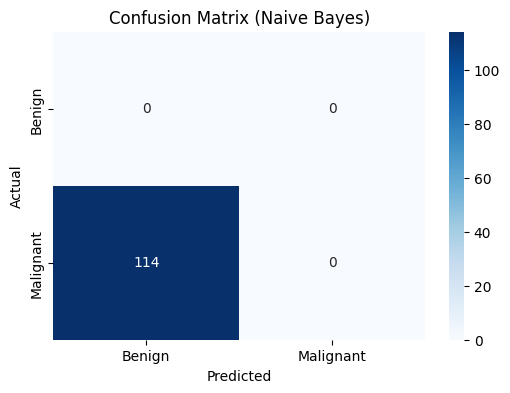

In [143]:
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [142]:
print("\nClassification Report (NB): ")
print(classification_report(y_test, test_pred_nb))


Classification Report (NB): 
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        72
           M       0.37      1.00      0.54        42

    accuracy                           0.37       114
   macro avg       0.18      0.50      0.27       114
weighted avg       0.14      0.37      0.20       114



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [137]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Std Deviation: 0.0
